# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools_fixed1 import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('api_keys.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Execute GET for btc and eth
btc_response_data = requests.get(btc_url)
eth_response_data = requests.get(eth_url)
# Convert to json
btc_data = btc_response_data.json()
eth_data = eth_response_data.json()

In [6]:
# Show btc json data
print(json.dumps(btc_data, indent=4))
# Show eth json data
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19607412,
            "total_supply": 19607412,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 39710.0,
                    "volume_24h": 19195943163,
                    "market_cap": 779248434167,
                    "percentage_change_1h": 0.106823452127708,
                    "percentage_change_24h": 1.26991944423068,
                    "percentage_change_7d": -6.77125640477972,
                    "percent_change_1h": 0.106823452127708,
                    "percent_change_24h": 1.26991944423068,
                    "percent_change_7d": -6.77125640477972
                }
            },
            "last_updated": 1706129074
        }
    },
    "metadata": {
        "timestamp": 1706129074,
        "num_crypt

In [7]:
# Fetch btc price
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
btc_price


39710.0

In [8]:
# Fetch eth price
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
eth_price

2209.17

In [9]:
# Calculate my value of btc and eth
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $47652.00
The current value of your 5.3 ETH is $11708.60


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [12]:
# Format current date as ISO format
start_date = pd.Timestamp("2024-01-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2024-01-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
df_ticker

# Reorganize the DataFrame
# Separate ticker data
agg = df_ticker[df_ticker['symbol'] == 'AGG'].drop('symbol', axis=1)
spy = df_ticker[df_ticker['symbol'] == 'SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([agg, spy], axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_ticker.head()

AGG                                               
                           close   high      low trade_count   open   volume   
timestamp                                                                      
2024-01-19 05:00:00+00:00  98.02  98.02  97.6714       32022  97.89  9126093  \

                                        SPY                                 
                               vwap   close    high       low trade_count   
timestamp                                                                   
2024-01-19 05:00:00+00:00  97.90435  482.43  482.72  476.5374      608468  \

                                                          
                             open     volume        vwap  
timestamp                                                 
2024-01-19 05:00:00+00:00  477.65  110834483  479.966713

In [13]:
# Create empty data frame for closing prices
df_closing_prices = pd.DataFrame()

# Pick AGG and SPY close prices
df_closing_prices['AGG'] = df_ticker['AGG']['close']
df_closing_prices['SPY'] = df_ticker['SPY']['close']

# Drop timestamp
df_closing_prices.index = df_closing_prices.index.date

df_closing_prices.head()

,AGG,SPY
2024-01-19,98.02,482.43


In [14]:
# Define agg and spy closing prices
agg_close_price = df_closing_prices.iloc[0, 0]
spy_close_price = df_closing_prices.iloc[0, 1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.02
Current SPY closing price: $482.43


In [15]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $24121.50
The current value of your 200 AGG shares is $19604.00


### Savings Health Analysis

In [16]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
# Add together crypto values
crypto_value = my_btc_value + my_eth_value

# Add stock values together
stock_value = my_agg_value + my_spy_value

# Consolodate into savings_data list
savings_data = [crypto_value, stock_value]

# Create savings DataFrame
savings_df = pd.DataFrame(data=savings_data, columns=['amount'], index=['crypto', 'stock/bond'])

# Set total porfolio value variable
total_port_value = crypto_value + stock_value
# Display savings DataFrame
savings_df.head()

,amount
crypto,59360.601
stock/bond,43725.500


<Axes: title={'center': 'Total Savings'}, ylabel='amount'>

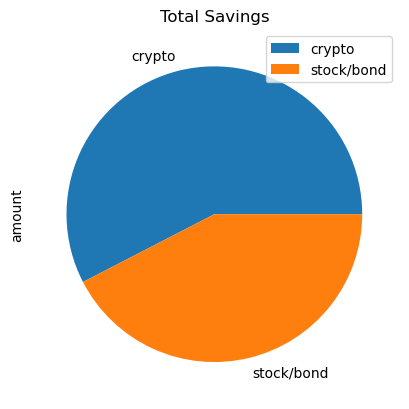

In [17]:
# Plot savings pie chart
savings_df.plot.pie(y='amount', title= "Total Savings")

In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Define difference between emergency fund and total_port_value
savings_to_go = emergency_fund - total_port_value

# Calculate total amount of savings

if total_port_value > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_port_value == emergency_fund:
    print("Congratulations! You've reached your emergency fund goal!")
elif total_port_value < emergency_fund:
    print(f'You have {savings_to_go} to go to reach your emergency fund goal.')

# Validate saving health
# YOUR CODE HERE!

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-05-01', tz='America/New_York').isoformat()

# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]
timeframe = "1Day"
MC_ticker_data = api.get_bars(
    tickers, 
    timeframe, 
    start=start_date, 
    end=end_date).df
MC_ticker_data

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2018-05-01 04:00:00+00:00,105.67,105.79,105.600,11965,105.73,3385450,105.662373,AGG
2018-05-02 04:00:00+00:00,105.67,105.78,105.620,11838,105.70,2926894,105.677062,AGG
2018-05-03 04:00:00+00:00,105.79,105.95,105.780,14802,105.82,4592146,105.873997,AGG
2018-05-04 04:00:00+00:00,105.86,105.93,105.710,9991,105.92,2497682,105.827710,AGG
2018-05-07 04:00:00+00:00,105.81,105.88,105.770,7644,105.88,1645406,105.816368,AGG
...,...,...,...,...,...,...,...,...
2023-04-25 04:00:00+00:00,406.08,411.16,406.020,611558,410.58,97766721,408.273308,SPY
2023-04-26 04:00:00+00:00,404.36,407.84,403.780,571685,406.72,80447049,405.599605,SPY
2023-04-27 04:00:00+00:00,412.41,412.69,406.740,614869,407.00,92968369,410.101896,SPY


In [20]:
# Reorganize the DataFrame
# Separate ticker data
AGG = MC_ticker_data[MC_ticker_data['symbol'] == 'AGG'].drop('symbol', axis=1)
SPY = MC_ticker_data[MC_ticker_data['symbol'] == 'SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=['SPY','AGG'])

# Display sample data
df_stock_data

SPY                                         
                            close    high       low trade_count    open   
timestamp                                                                 
2018-05-01 04:00:00+00:00  105.67  105.79  105.6000       11965  105.73  \
2018-05-02 04:00:00+00:00  105.67  105.78  105.6200       11838  105.70   
2018-05-03 04:00:00+00:00  105.79  105.95  105.7800       14802  105.82   
2018-05-04 04:00:00+00:00  105.86  105.93  105.7100        9991  105.92   
2018-05-07 04:00:00+00:00  105.81  105.88  105.7700        7644  105.88   
...                           ...     ...       ...         ...     ...   
2023-04-25 04:00:00+00:00  100.18  100.25   99.9636       26743   99.97   
2023-04-26 04:00:00+00:00   99.81  100.22   99.7200       18350  100.16   
2023-04-27 04:00:00+00:00   99.45   99.63   99.3900       21343   99.61   
2023-04-28 04:00:00+00:00   99.96   99.99   99.7200       24407   99.99   
2023-05-01 04:00:00+00:00   98.69   99.41   98.5950       24228   99.35   

                                                    AGG                      
                             volume        vwap   close      high      low   
timestamp                                                                    
2018-05-01 04:00:00+00:00   3385450  105.662373  264.96  265.1000  262.110  \
2018-05-02 04:00:00+00:00   2926894  105.677062  263.17  265.6800  262.760   
2018-05-03 04:00:00+00:00   4592146  105.873997  262.59  263.3600  259.050   
2018-05-04 04:00:00+00:00   2497682  105.827710  265.92  266.7892  261.150   
2018-05-07 04:00:00+00:00   1645406  105.816368  266.92  268.0200  266.110   
...                             ...         ...     ...       ...      ...   
2023-04-25 04:00:00+00:00   5065415  100.112017  406.08  411.1600  406.020   
2023-04-26 04:00:00+00:00   3723566   99.907609  404.36  407.8400  403.780   
2023-04-27 04:00:00+00:00   4018321   99.478744  412.41  412.6900  406.740   
2023-04-28 04:00:00+00:00   5469882   99.900869  415.93  415.9400  411.430   
2023-05-01 04:00:00+00:00  10631644   99.028458  415.51  417.6200  415.265   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2018-05-01 04:00:00+00:00      296316  263.90   77000433  263.937778  
2018-05-02 04:00:00+00:00      300566  264.76   87960465  264.101782  
2018-05-03 04:00:00+00:00      519979  262.26  138114268  261.695409  
2018-05-04 04:00:00+00:00      326637  261.52   92744409  264.873781  
2018-05-07 04:00:00+00:00      242694  266.89   56246159  267.101522  
...                               ...     ...        ...         ...  
2023-04-25 04:00:00+00:00      611558  410.58   97766721  408.273308  
2023-04-26 04:00:00+00:00      571685  406.72   80447049  405.599605  
2023-04-27 04:00:00+00:00      614869  407.00   92968369  410.101896  
2023-04-28 04:00:00+00:00      611065  411.49   89312589  414.398827  
2023-05-01 04:00:00+00:00      502374  415.47   62122254  416.206574  

[1259 rows x 14 columns]

In [21]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.60, 0.40],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [22]:
# Printing the simulation input data
MC_30year.portfolio_data

SPY                                         
                            close    high       low trade_count    open   
timestamp                                                                 
2018-05-01 04:00:00+00:00  105.67  105.79  105.6000       11965  105.73  \
2018-05-02 04:00:00+00:00  105.67  105.78  105.6200       11838  105.70   
2018-05-03 04:00:00+00:00  105.79  105.95  105.7800       14802  105.82   
2018-05-04 04:00:00+00:00  105.86  105.93  105.7100        9991  105.92   
2018-05-07 04:00:00+00:00  105.81  105.88  105.7700        7644  105.88   
...                           ...     ...       ...         ...     ...   
2023-04-25 04:00:00+00:00  100.18  100.25   99.9636       26743   99.97   
2023-04-26 04:00:00+00:00   99.81  100.22   99.7200       18350  100.16   
2023-04-27 04:00:00+00:00   99.45   99.63   99.3900       21343   99.61   
2023-04-28 04:00:00+00:00   99.96   99.99   99.7200       24407   99.99   
2023-05-01 04:00:00+00:00   98.69   99.41   98.5950       24228   99.35   

                                                                 AGG   
                             volume        vwap daily_return   close   
timestamp                                                              
2018-05-01 04:00:00+00:00   3385450  105.662373          NaN  264.96  \
2018-05-02 04:00:00+00:00   2926894  105.677062     0.000000  263.17   
2018-05-03 04:00:00+00:00   4592146  105.873997     0.001136  262.59   
2018-05-04 04:00:00+00:00   2497682  105.827710     0.000662  265.92   
2018-05-07 04:00:00+00:00   1645406  105.816368    -0.000472  266.92   
...                             ...         ...          ...     ...   
2023-04-25 04:00:00+00:00   5065415  100.112017     0.006227  406.08   
2023-04-26 04:00:00+00:00   3723566   99.907609    -0.003693  404.36   
2023-04-27 04:00:00+00:00   4018321   99.478744    -0.003607  412.41   
2023-04-28 04:00:00+00:00   5469882   99.900869     0.005128  415.93   
2023-05-01 04:00:00+00:00  10631644   99.028458    -0.012705  415.51   

                                                                              
                               high      low trade_count    open     volume   
timestamp                                                                     
2018-05-01 04:00:00+00:00  265.1000  262.110      296316  263.90   77000433  \
2018-05-02 04:00:00+00:00  265.6800  262.760      300566  264.76   87960465   
2018-05-03 04:00:00+00:00  263.3600  259.050      519979  262.26  138114268   
2018-05-04 04:00:00+00:00  266.7892  261.150      326637  261.52   92744409   
2018-05-07 04:00:00+00:00  268.0200  266.110      242694  266.89   56246159   
...                             ...      ...         ...     ...        ...   
2023-04-25 04:00:00+00:00  411.1600  406.020      611558  410.58   97766721   
2023-04-26 04:00:00+00:00  407.8400  403.780      571685  406.72   80447049   
2023-04-27 04:00:00+00:00  412.6900  406.740      614869  407.00   92968369   
2023-04-28 04:00:00+00:00  415.9400  411.430      611065  411.49   89312589   
2023-05-01 04:00:00+00:00  417.6200  415.265      502374  415.47   62122254   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-05-01 04:00:00+00:00  263.937778          NaN  
2018-05-02 04:00:00+00:00  264.101782    -0.006756  
2018-05-03 04:00:00+00:00  261.695409    -0.002204  
2018-05-04 04:00:00+00:00  264.873781     0.012681  
2018-05-07 04:00:00+00:00  267.101522     0.003761  
...                               ...          ...  
2023-04-25 04:00:00+00:00  408.273308    -0.015874  
2023-04-26 04:00:00+00:00  405.599605    -0.004236  
2023-04-27 04:00:00+00:00  410.101896     0.019908  
2023-04-28 04:00:00+00:00  414.398827     0.008535  
2023-05-01 04:00:00+00:00  416.206574    -0.001010  

[1259 rows x 16 columns]

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001193,0.999417,1.000239,0.995876,0.995203,0.994117,0.991483,0.992383,0.998721,0.999144,...,1.004844,0.984247,0.999083,0.992783,0.995634,1.002536,1.004701,1.004573,1.002598,0.990395
2,1.002871,1.009814,0.998838,0.988522,0.999263,1.000826,0.996746,1.001264,0.997491,0.996888,...,1.002861,0.975885,1.000578,0.988782,0.985241,1.006580,0.991459,1.005198,1.005058,0.986353
3,1.000344,1.007544,1.002863,0.991926,0.995891,0.988586,1.005221,1.001239,0.990011,0.999477,...,1.008171,0.979835,0.993947,0.990801,0.995737,1.012468,0.993292,1.003165,1.008849,0.988080
4,1.010117,0.998201,1.007540,0.995869,1.001002,0.974035,1.007597,1.005529,0.982599,1.007876,...,1.000850,0.981203,1.006478,0.989065,0.998463,1.015791,0.998149,1.001769,1.003437,0.993103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.049247,3.484715,2.836682,3.332596,2.421900,3.487576,3.557031,2.712041,2.072110,2.360590,...,1.431633,3.596293,4.430463,3.856373,3.791889,2.030647,1.861162,3.260516,3.666970,2.286515
7557,2.069269,3.480553,2.832063,3.335615,2.429228,3.480053,3.565295,2.710563,2.064111,2.352571,...,1.427248,3.622277,4.493011,3.869916,3.787240,2.029849,1.884491,3.263834,3.708567,2.280989
7558,2.080703,3.484537,2.824696,3.323620,2.452981,3.498415,3.561086,2.715633,2.067001,2.391248,...,1.437433,3.613220,4.494929,3.891979,3.808220,2.059103,1.880716,3.242180,3.711051,2.257726
7559,2.076698,3.495220,2.827095,3.324018,2.478363,3.499157,3.573799,2.698016,2.081489,2.394894,...,1.427439,3.598472,4.489478,3.898742,3.812051,2.068258,1.904987,3.236300,3.719097,2.262367


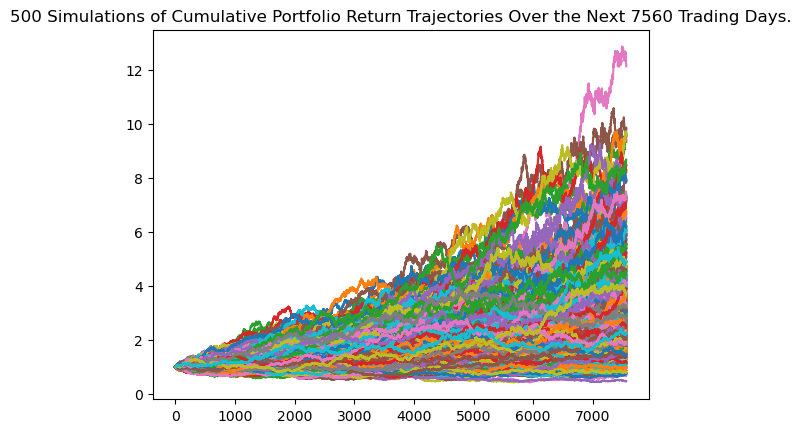

In [24]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()

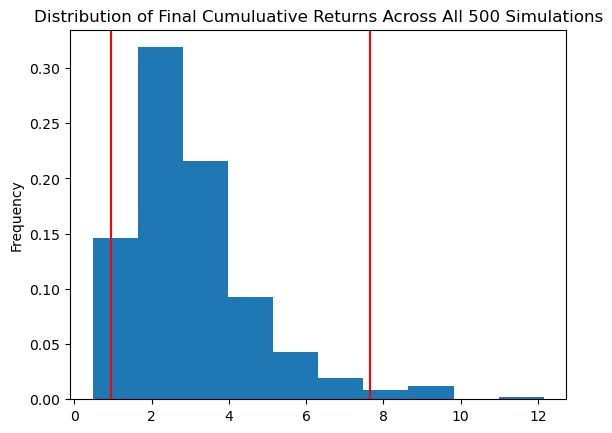

In [25]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              3.048366
std               1.677198
min               0.480951
25%               1.968647
50%               2.683537
75%               3.652368
max              12.151704
95% CI Lower      0.954303
95% CI Upper      7.656516
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [27]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]* initial_investment,2)
ci_upper = round(tbl[9]* initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $19086.07 and $153130.32


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [28]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]* initial_investment,2)
ci_upper = round(tbl[9]* initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $28629.1 and $229695.48


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
# Adjust weights for aggressive investing
    weights = [0.80, 0.20],
    num_simulation = 500,
    num_trading_days = 252 * 5
)
MC_5year.portfolio_data

SPY                                         
                            close    high       low trade_count    open   
timestamp                                                                 
2018-05-01 04:00:00+00:00  105.67  105.79  105.6000       11965  105.73  \
2018-05-02 04:00:00+00:00  105.67  105.78  105.6200       11838  105.70   
2018-05-03 04:00:00+00:00  105.79  105.95  105.7800       14802  105.82   
2018-05-04 04:00:00+00:00  105.86  105.93  105.7100        9991  105.92   
2018-05-07 04:00:00+00:00  105.81  105.88  105.7700        7644  105.88   
...                           ...     ...       ...         ...     ...   
2023-04-25 04:00:00+00:00  100.18  100.25   99.9636       26743   99.97   
2023-04-26 04:00:00+00:00   99.81  100.22   99.7200       18350  100.16   
2023-04-27 04:00:00+00:00   99.45   99.63   99.3900       21343   99.61   
2023-04-28 04:00:00+00:00   99.96   99.99   99.7200       24407   99.99   
2023-05-01 04:00:00+00:00   98.69   99.41   98.5950       24228   99.35   

                                                                 AGG   
                             volume        vwap daily_return   close   
timestamp                                                              
2018-05-01 04:00:00+00:00   3385450  105.662373          NaN  264.96  \
2018-05-02 04:00:00+00:00   2926894  105.677062     0.000000  263.17   
2018-05-03 04:00:00+00:00   4592146  105.873997     0.001136  262.59   
2018-05-04 04:00:00+00:00   2497682  105.827710     0.000662  265.92   
2018-05-07 04:00:00+00:00   1645406  105.816368    -0.000472  266.92   
...                             ...         ...          ...     ...   
2023-04-25 04:00:00+00:00   5065415  100.112017     0.006227  406.08   
2023-04-26 04:00:00+00:00   3723566   99.907609    -0.003693  404.36   
2023-04-27 04:00:00+00:00   4018321   99.478744    -0.003607  412.41   
2023-04-28 04:00:00+00:00   5469882   99.900869     0.005128  415.93   
2023-05-01 04:00:00+00:00  10631644   99.028458    -0.012705  415.51   

                                                                              
                               high      low trade_count    open     volume   
timestamp                                                                     
2018-05-01 04:00:00+00:00  265.1000  262.110      296316  263.90   77000433  \
2018-05-02 04:00:00+00:00  265.6800  262.760      300566  264.76   87960465   
2018-05-03 04:00:00+00:00  263.3600  259.050      519979  262.26  138114268   
2018-05-04 04:00:00+00:00  266.7892  261.150      326637  261.52   92744409   
2018-05-07 04:00:00+00:00  268.0200  266.110      242694  266.89   56246159   
...                             ...      ...         ...     ...        ...   
2023-04-25 04:00:00+00:00  411.1600  406.020      611558  410.58   97766721   
2023-04-26 04:00:00+00:00  407.8400  403.780      571685  406.72   80447049   
2023-04-27 04:00:00+00:00  412.6900  406.740      614869  407.00   92968369   
2023-04-28 04:00:00+00:00  415.9400  411.430      611065  411.49   89312589   
2023-05-01 04:00:00+00:00  417.6200  415.265      502374  415.47   62122254   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-05-01 04:00:00+00:00  263.937778          NaN  
2018-05-02 04:00:00+00:00  264.101782    -0.006756  
2018-05-03 04:00:00+00:00  261.695409    -0.002204  
2018-05-04 04:00:00+00:00  264.873781     0.012681  
2018-05-07 04:00:00+00:00  267.101522     0.003761  
...                               ...          ...  
2023-04-25 04:00:00+00:00  408.273308    -0.015874  
2023-04-26 04:00:00+00:00  405.599605    -0.004236  
2023-04-27 04:00:00+00:00  410.101896     0.019908  
2023-04-28 04:00:00+00:00  414.398827     0.008535  
2023-05-01 04:00:00+00:00  416.206574    -0.001010  

[1259 rows x 16 columns]

In [30]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002454,1.001404,0.999127,1.003618,1.005032,0.997754,0.998551,1.002749,1.007209,1.004509,...,1.001680,1.004848,0.999589,0.997213,1.001733,0.998545,1.001365,0.997771,1.000104,0.996825
2,1.001751,1.011325,0.996084,1.006149,1.002659,0.995284,0.993146,1.003677,1.008284,1.008528,...,1.001557,1.004756,1.002518,0.993035,0.997265,0.997509,1.005377,0.988515,0.996003,0.997330
3,1.004211,1.006616,0.988399,1.006923,1.004692,0.992691,0.994555,1.005951,1.009600,1.013841,...,1.003026,1.004242,1.011229,0.989602,0.999608,0.994840,1.009590,0.999387,0.987194,0.987298
4,1.001020,1.003873,0.991774,1.005151,1.005170,0.995320,0.991822,1.000891,1.003584,1.020253,...,1.003144,1.011204,1.007800,0.993378,1.003023,0.988919,1.004849,1.000003,0.984614,0.986724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.944187,0.974814,1.116487,1.039189,1.008560,1.046847,1.054188,0.926512,0.921823,0.940713,...,1.441502,1.214501,0.948846,1.194272,1.431651,1.035654,0.903639,0.970398,1.336787,1.025345
1257,0.943995,0.972053,1.118368,1.043952,1.002042,1.047665,1.057540,0.923730,0.923456,0.933571,...,1.444823,1.211978,0.947488,1.198789,1.426161,1.035731,0.907121,0.971106,1.335670,1.026391
1258,0.939245,0.970213,1.119214,1.043974,0.999526,1.049659,1.052510,0.922153,0.922811,0.925411,...,1.445929,1.223698,0.946612,1.200370,1.426077,1.030913,0.906842,0.972774,1.334138,1.020701
1259,0.937757,0.965858,1.126273,1.042341,1.000645,1.044827,1.055392,0.929700,0.920787,0.929050,...,1.443541,1.233178,0.947935,1.199812,1.428151,1.023772,0.907544,0.978238,1.333109,1.018306


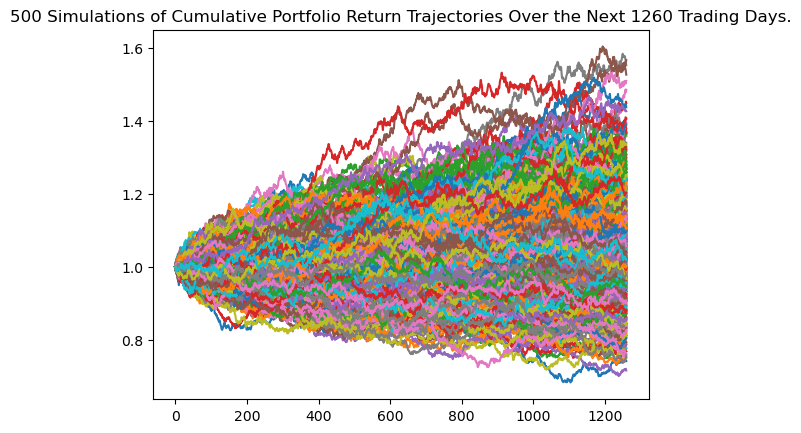

In [31]:
# Plot simulation outcomes
five_year_line_plot = MC_5year.plot_simulation()

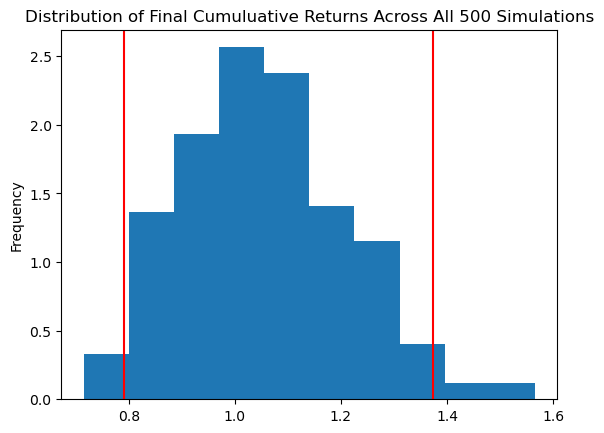

In [32]:
# Plot probability distribution and confidence intervals
five_year_dist_plot = MC_5year.plot_distribution()

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.056115
std               0.154508
min               0.715508
25%               0.942031
50%               1.046710
75%               1.155178
max               1.565523
95% CI Lower      0.791936
95% CI Upper      1.373912
Name: 1260, dtype: float64


In [34]:
# Set initial investment
# Initial inv value found from sample output below, initial inv value otherwise unclear.
five_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]* initial_investment,2)
ci_upper_five = round(tbl[9]* initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $23758.09 and $41217.37


### Ten Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
# Adjust weights for aggressive investing
    weights = [0.80, 0.20],
    num_simulation = 500,
    num_trading_days = 252 * 10
)
MC_10year.portfolio_data

SPY                                         
                            close    high       low trade_count    open   
timestamp                                                                 
2018-05-01 04:00:00+00:00  105.67  105.79  105.6000       11965  105.73  \
2018-05-02 04:00:00+00:00  105.67  105.78  105.6200       11838  105.70   
2018-05-03 04:00:00+00:00  105.79  105.95  105.7800       14802  105.82   
2018-05-04 04:00:00+00:00  105.86  105.93  105.7100        9991  105.92   
2018-05-07 04:00:00+00:00  105.81  105.88  105.7700        7644  105.88   
...                           ...     ...       ...         ...     ...   
2023-04-25 04:00:00+00:00  100.18  100.25   99.9636       26743   99.97   
2023-04-26 04:00:00+00:00   99.81  100.22   99.7200       18350  100.16   
2023-04-27 04:00:00+00:00   99.45   99.63   99.3900       21343   99.61   
2023-04-28 04:00:00+00:00   99.96   99.99   99.7200       24407   99.99   
2023-05-01 04:00:00+00:00   98.69   99.41   98.5950       24228   99.35   

                                                                 AGG   
                             volume        vwap daily_return   close   
timestamp                                                              
2018-05-01 04:00:00+00:00   3385450  105.662373          NaN  264.96  \
2018-05-02 04:00:00+00:00   2926894  105.677062     0.000000  263.17   
2018-05-03 04:00:00+00:00   4592146  105.873997     0.001136  262.59   
2018-05-04 04:00:00+00:00   2497682  105.827710     0.000662  265.92   
2018-05-07 04:00:00+00:00   1645406  105.816368    -0.000472  266.92   
...                             ...         ...          ...     ...   
2023-04-25 04:00:00+00:00   5065415  100.112017     0.006227  406.08   
2023-04-26 04:00:00+00:00   3723566   99.907609    -0.003693  404.36   
2023-04-27 04:00:00+00:00   4018321   99.478744    -0.003607  412.41   
2023-04-28 04:00:00+00:00   5469882   99.900869     0.005128  415.93   
2023-05-01 04:00:00+00:00  10631644   99.028458    -0.012705  415.51   

                                                                              
                               high      low trade_count    open     volume   
timestamp                                                                     
2018-05-01 04:00:00+00:00  265.1000  262.110      296316  263.90   77000433  \
2018-05-02 04:00:00+00:00  265.6800  262.760      300566  264.76   87960465   
2018-05-03 04:00:00+00:00  263.3600  259.050      519979  262.26  138114268   
2018-05-04 04:00:00+00:00  266.7892  261.150      326637  261.52   92744409   
2018-05-07 04:00:00+00:00  268.0200  266.110      242694  266.89   56246159   
...                             ...      ...         ...     ...        ...   
2023-04-25 04:00:00+00:00  411.1600  406.020      611558  410.58   97766721   
2023-04-26 04:00:00+00:00  407.8400  403.780      571685  406.72   80447049   
2023-04-27 04:00:00+00:00  412.6900  406.740      614869  407.00   92968369   
2023-04-28 04:00:00+00:00  415.9400  411.430      611065  411.49   89312589   
2023-05-01 04:00:00+00:00  417.6200  415.265      502374  415.47   62122254   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-05-01 04:00:00+00:00  263.937778          NaN  
2018-05-02 04:00:00+00:00  264.101782    -0.006756  
2018-05-03 04:00:00+00:00  261.695409    -0.002204  
2018-05-04 04:00:00+00:00  264.873781     0.012681  
2018-05-07 04:00:00+00:00  267.101522     0.003761  
...                               ...          ...  
2023-04-25 04:00:00+00:00  408.273308    -0.015874  
2023-04-26 04:00:00+00:00  405.599605    -0.004236  
2023-04-27 04:00:00+00:00  410.101896     0.019908  
2023-04-28 04:00:00+00:00  414.398827     0.008535  
2023-05-01 04:00:00+00:00  416.206574    -0.001010  

[1259 rows x 16 columns]

In [36]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996406,1.003645,1.000864,1.001360,0.996697,0.998241,0.995427,1.000791,0.998921,0.997129,...,0.998035,1.002400,0.997415,1.003676,0.998686,0.997955,0.996899,0.992794,1.001941,1.002263
2,0.999801,1.007285,0.994150,1.003928,1.004856,0.998895,0.997690,0.997687,0.995608,0.995467,...,0.995044,1.001912,1.003124,0.997810,1.003890,0.999396,0.988606,0.990974,1.005187,0.996668
3,0.995414,1.001955,1.001596,1.005550,0.997457,0.999204,1.000114,1.002144,0.990857,0.996330,...,0.992553,1.003295,1.002700,0.997568,1.006601,0.997835,0.983560,0.990330,1.003264,0.996280
4,1.001358,1.002640,0.997558,1.007294,0.996574,0.997541,0.998213,1.005793,0.994350,0.999996,...,0.993929,1.005022,1.002962,1.000591,1.004939,0.993255,0.985052,0.994994,1.010180,1.001514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.176144,1.009821,1.691757,1.315805,1.194464,0.909978,1.286599,0.885606,1.055308,1.484592,...,1.123306,0.928107,1.188394,1.134491,1.559292,0.889545,1.364443,1.025151,1.285393,1.255676
2517,1.177666,1.012920,1.691157,1.317435,1.201068,0.907429,1.290892,0.884563,1.051252,1.484918,...,1.125405,0.935695,1.186334,1.136979,1.556688,0.885481,1.364434,1.016461,1.283898,1.257502
2518,1.173549,1.015817,1.686015,1.313050,1.205961,0.904419,1.289925,0.883561,1.046795,1.484930,...,1.122620,0.937867,1.181413,1.139899,1.556113,0.885904,1.363972,1.018103,1.286948,1.262311
2519,1.170045,1.015097,1.683702,1.314287,1.207310,0.903938,1.287065,0.880091,1.048114,1.469049,...,1.119042,0.946784,1.187468,1.138494,1.565633,0.892018,1.375896,1.016994,1.282881,1.271933


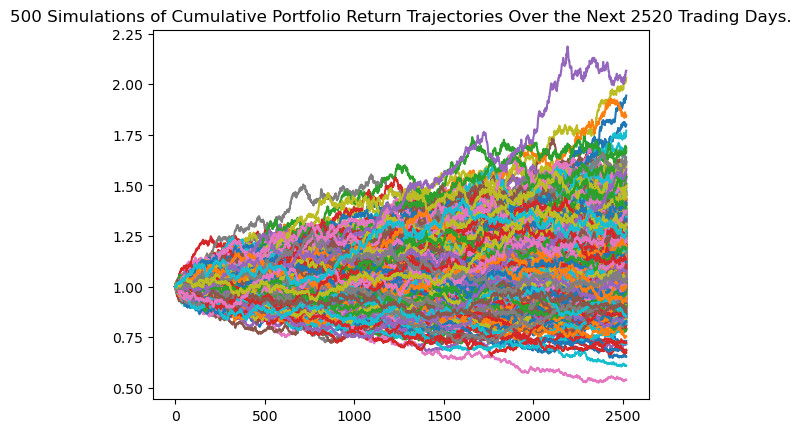

In [37]:
# Plot simulation outcomes
ten_year_line_plot = MC_10year.plot_simulation()

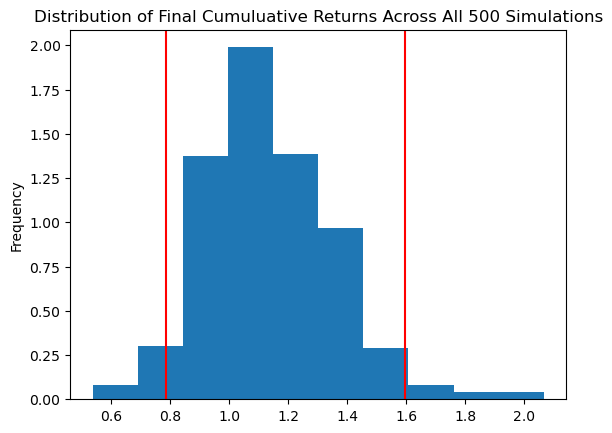

In [38]:
# Plot probability distribution and confidence intervals
ten_year_dist_plot = MC_10year.plot_distribution()

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.134569
std               0.218129
min               0.538300
25%               0.985340
50%               1.119665
75%               1.278325
max               2.066893
95% CI Lower      0.787307
95% CI Upper      1.597655
Name: 2520, dtype: float64


In [40]:
# Set initial investment
# Initial inv value found from sample output below, initial inv value otherwise unclear.
ten_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]* initial_investment,2)
ci_upper_ten = round(tbl[9]* initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $23619.2 and $47929.65
